# Analisis básico de valores con Pandas.  Parte I.

Este Notebook ha sido elaborado por [@Paduel](https://t.me/paduel) para el grupo de Telegram ['Python para Trading'](https://t.me/pythontrading).


## Módulos 

Vamos a utilizar el módulo **Pandas** que permite manejar de forma eficiente datos estructurados. Un **DataFrame** de Pandas es una matriz ordenada que puede contener cualquier tipo de datos. 


Se ordena en columnas, que deben contener siempre un mismo tipo de dato, y en filas que generan un indice.

Para descargar los datos utilizaremos **Pandas Datareader** un módulo asociado a Pandas que permite descargar desde distintas fuentes.

Debido a que Yahoo descontinuó su API para datos financieros, para que la descarga desde Yahoo funcione correctamente, debemos aplicarle un parche, de lo que se ocupa el módulo **Fix Yahoo Finance**.

Los calculos mas complejos los resolveremos con el módulo **Numpy**.

Para las gráficas inicialmente utilizaremos la librería **Matplotlib**.

Y para utilizar datos temporales adecuadamente **Datetime**.

Si quieres correr este codigo, debes asegurarte tener instalados correctamente los paquetes mencionados.

In [2]:
import pandas as pd # Importamos Pandas y para simplificar le asignamos el nombre pd

from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
yf.pdr_override() # Importamos Pandas Datareader y lo parcheamos para que funcione con Yahoo

import numpy as np # Importamos Numpy y le asociamos el nombre np

import datetime # Importamos datetime pero en este caso no vamos a asignarle ningún nombre

# Para graficar correctamente en el notebook hacemos lo siguiente
%matplotlib inline   
# esto hace que los gráficos se visualicen en el notebook
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20, 10 # Definimos el tamaño de los gráficos para que se ajusten bien al notebook



---

## Descarga de datos

Descargaremos el histórico diario de Santantander y BBVA desde principios de 2008 hasta final de 2017, diez años.
Para ello pasaremos como parametros los tickers de los valores y las fechas de inicio y fin. Los tickers para otros valores se pueden localizar en la página de Yahoo.

In [3]:
start = datetime.datetime(2008, 1, 1)
end=datetime.datetime(2017, 12, 31)
tickers=['SAN.MC', 'BBVA.MC']
data=pdr.get_data_yahoo(tickers, start=start, end=end)

[*********************100%***********************]  2 of 2 downloaded


Lo que recibimos en data es un **Panel** de Pandas, una matriz de tres dimensiones, algo similar al un libro de Excel.
Veamos sus dimensiones.

In [4]:
data.shape

(6, 2555, 2)

Podemos acceder independientemente a cada uno de los valores pasando el ticker.
Comprobemos las primeras filas del Santander.

In [5]:
data.minor_xs('SAN.MC').head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,13.2489,13.3302,13.0953,13.1766,5.671596,103998100.0
2008-01-03,13.1405,13.2037,12.9689,13.0502,5.617190,113222703.0
2008-01-04,13.0050,13.0863,12.7070,12.8605,5.535538,100543802.0
2008-01-07,12.8154,12.9057,12.6889,12.7793,5.500588,71995342.0
2008-01-08,12.7883,12.8063,12.4993,12.5806,5.415061,83100401.0


---

## Inspección de los datos recibidos

Para hacer mas sencillo este Notebook, vamos a separar los valores en dos dataframe independientes, para facilitar su comprensión.
Pero si trabajaramos con un número mas alto de valores el uso del panel, o bien de un dataframe multi-indice sería mas eficiente.

In [6]:
san=data.minor_xs('SAN.MC')
bbva=data.minor_xs('BBVA.MC')

In [7]:
bbva.head() # comprobamos los primeros datos de BBVA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,16.1021,16.1597,15.8523,15.9291,8.746736,98910228.0
2008-01-03,15.9291,15.9291,15.6986,15.7946,8.672879,90699092.0
2008-01-04,15.7946,15.7946,15.3239,15.4680,8.493544,138136794.0
2008-01-07,15.4680,15.5929,15.3719,15.5352,8.530444,32842185.0
2008-01-08,15.5352,15.5833,15.1990,15.2374,8.366920,87804410.0


Revisamos las dimensiones de cada dataframe, vemos que ahora solo tienen dos dimensiones.

In [8]:
san.shape, bbva.shape

((2555, 6), (2555, 6))

Veamos algunas caracteristica del dataframe del Santander.

In [9]:
san.index # su indice son las fechas de los dias cotizados

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2017-12-14', '2017-12-15', '2017-12-18', '2017-12-19',
               '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-27',
               '2017-12-28', '2017-12-29'],
              dtype='datetime64[ns]', name='Date', length=2555, freq=None)

In [10]:
san.columns # las columnas recogen los distintos valores de cada dia

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Podemos acceder a la información seleccionando los datos de multiples formas.

In [11]:
san[['Close']][-10:] # Veamos los diez últimos valores de cierre del Santander.

,Close
Date,
2017-12-14,5.616
2017-12-15,5.624
2017-12-18,5.671
2017-12-19,5.673
2017-12-20,5.631
2017-12-21,5.717
2017-12-22,5.594
2017-12-27,5.560
2017-12-28,5.511


In [12]:
san[['High','Low']].head() # Los 5 primeros mínimos y máximos

,High,Low
Date,,
2008-01-02,13.3302,13.0953
2008-01-03,13.2037,12.9689
2008-01-04,13.0863,12.7070
2008-01-07,12.9057,12.6889
2008-01-08,12.8063,12.4993


In [13]:
san[['Adj Close','Volume']].loc[pd.Timestamp('2015-11-01'):pd.Timestamp('2015-11-10')] 
# El cierrre ajustado y el volumen desde el 1 al 10 de novimbre de 2015

,Adj Close,Volume
Date,,
2015-11-02,4.451454,57910508.0
2015-11-03,4.494708,148301916.0
2015-11-04,4.563044,105920463.0
2015-11-05,4.504223,87484985.0
2015-11-06,4.588989,86906806.0
2015-11-09,4.492112,71676192.0
2015-11-10,4.476537,39123436.0


Estos son algunos ejemplos de la facilidad que nos proporciona Pandas para segmentar los datos. Cualquier combinación de filtros sería posible.

---

## Trabajando los datos

Vamos a ver como podemos utilizar los datos para generar un nuevo dataframe y despues hacer una gráfica sencilla.

Tomamos los datos de cierre ajustado de ambos valores con ellos creamos el dataframe **diario**.

In [14]:
diario=pd.DataFrame() # creamos un dataframe vacio
diario['san']=san['Adj Close'] # añadimos una columna con los datos de cierre del Santander y la nombramos 'san'
diario['bbva']=bbva['Adj Close'] # lo mismo para el BBVA

In [15]:
diario.head(7) # veamos su cabezera

,san,bbva
Date,,
2008-01-02,5.671596,8.746736
2008-01-03,5.617190,8.672879
2008-01-04,5.535538,8.493544
2008-01-07,5.500588,8.530444
2008-01-08,5.415061,8.366920
2008-01-09,5.306204,8.261382
2008-01-10,5.244008,8.159203


In [16]:
diario.tail(7) # y su final

,san,bbva
Date,,
2017-12-19,5.498947,7.113235
2017-12-20,5.458236,7.104442
2017-12-21,5.541597,7.202138
2017-12-22,5.422370,7.096627
2017-12-27,5.389414,7.047779
2017-12-28,5.341918,6.982322
2017-12-29,5.310899,6.948129


Creamos la gráfica con el cierre ajustado de ambos valores. 
Pandas dispone de sus propios metodos para llamar al modulo Matplotlib, de forma que gráficar un dataframe se hace sencillo.

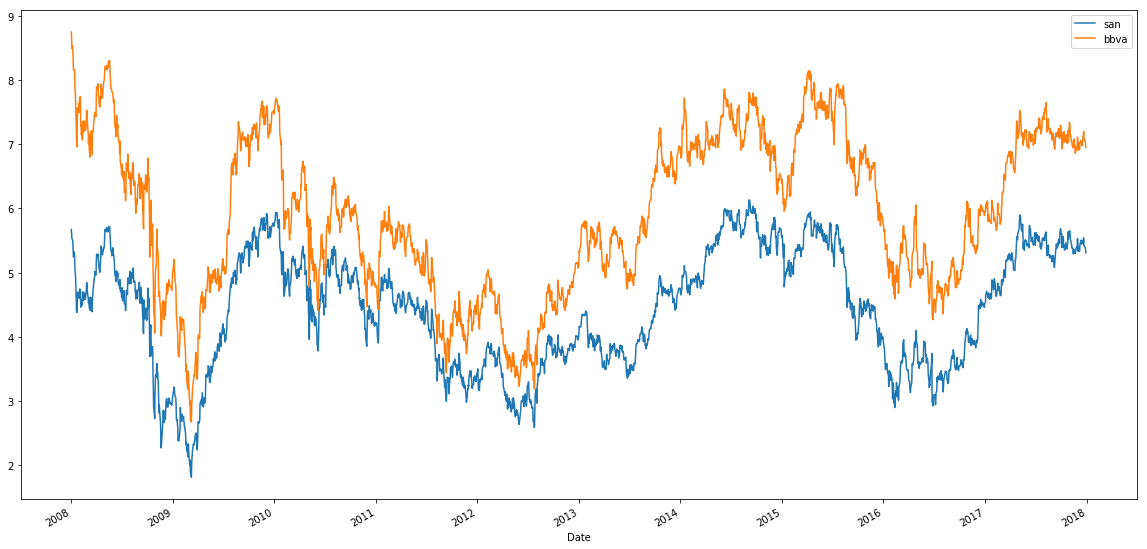

In [17]:
diario.plot() 

Podemos ver la gráfica de solo un año.

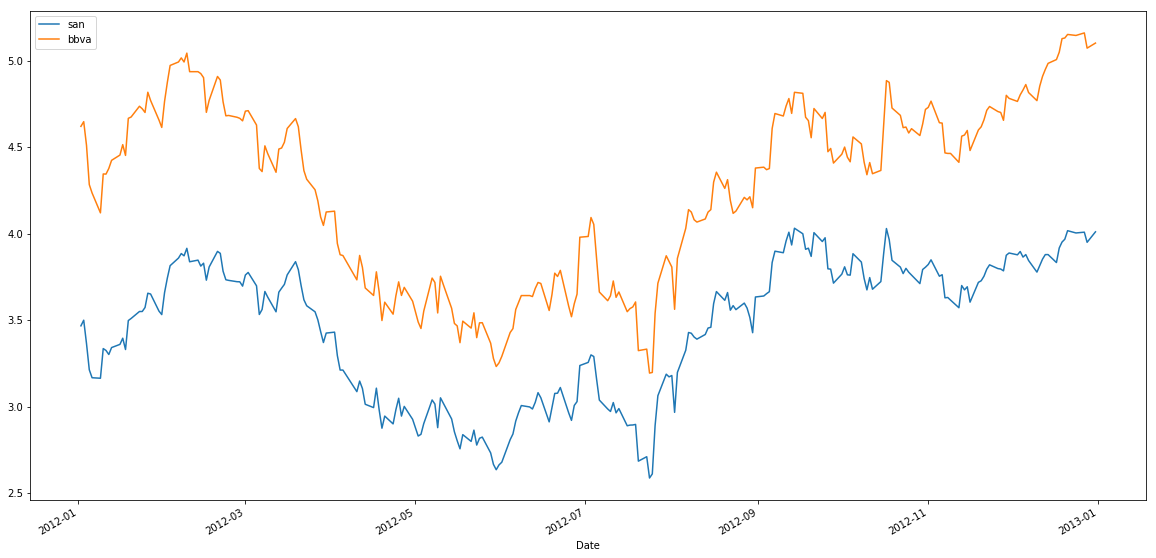

In [18]:
diario[diario.index.year==2012].plot()

---

# Remuestreo de datos

Los datos que tenemos son diarios, pero tal vez nos interesa la evolución mensual. Utilizando la función **resample** de pandas e indicandole como hacer el remuestreo para cada columna podemos hacerlo facilmente.

En este caso definiremos una función para hacer el remuestreo a cualquier dataframe de las mismas caracteristicas.

In [19]:
def remuestreo(df, tiempo):
    df=df.resample(tiempo).agg({'Open': 'first', 
                                     'High': 'max', 
                                     'Low': 'min', 
                                     'Close': 'last',
                                     'Adj Close': 'last',
                                     'Volume': 'sum'})
    return df

Las funciones nos permiten aplicar un mismo proceso a distintas variables. 

In [20]:
san_mes=remuestreo(san,'M')
bbva_mes=remuestreo(bbva, 'M')

Veamos los primeros meses de BBVA.

In [21]:
bbva_mes.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-31,16.1021,16.1597,11.9228,13.5177,7.498380,1.649478e+09
2008-02-29,13.5177,14.1902,12.5857,13.2198,7.333133,8.452638e+08
2008-03-31,13.2198,13.6810,12.1726,13.4024,7.434424,9.816524e+08
2008-04-30,13.4024,14.4304,13.2775,14.1902,8.030556,1.561043e+09
2008-05-31,14.1902,14.7955,13.6426,13.7675,7.791340,5.387756e+08


Podemos hacer otro remuestreo con un valor temporal distinto simplemente cambiando el valor de tiempo por otro como '3M', 'W', '2Y'.

---

## Añadiendo y modificando columnas

Hasta ahora hemos trabajado con las columnas de los datos que descargamos, creemos nuevas columnas con datos calculados a partir de los iniciales.

Vamos a calcular la apertura, máximo y mínimo ajustado de la serie temporal. 
De nuevo definimos una función para reutilizar el código.

In [22]:
def ajustado(df, lista):
    df=df.copy()
    for f in lista:
        df['Adj '+f]=df[f]*df['Adj Close']/df['Close']
    return df

In [23]:
san_ajustado=ajustado(san, ['Open','High','Low'])

In [24]:
san_ajustado.head()

,Open,High,Low,Close,Adj Close,Volume,Adj Open,Adj High,Adj Low
Date,,,,,,,,,
2008-01-02,13.2489,13.3302,13.0953,13.1766,5.671596,103998100.0,5.702716,5.737710,5.636602
2008-01-03,13.1405,13.2037,12.9689,13.0502,5.617190,113222703.0,5.656058,5.683261,5.582196
2008-01-04,13.0050,13.0863,12.7070,12.8605,5.535538,100543802.0,5.597735,5.632729,5.469467
2008-01-07,12.8154,12.9057,12.6889,12.7793,5.500588,71995342.0,5.516127,5.554994,5.461677
2008-01-08,12.7883,12.8063,12.4993,12.5806,5.415061,83100401.0,5.504461,5.512209,5.380067


No está mal. Pero hagamos que la función elimine los valores no ajustados y ordene correctamente las columnas.

Para comodidad eliminaremos de las columnas el prefijo Adj, ya sabemos que los valores que quedan están ajustados.

Estas funciones pueden ser copiadas para utilizar en otro codigo o con otros valores, por lo que merece la pena utilizar un poco de tiempo en definir funciones de las tareas que mas vamos a repetir.

O incluso recogerlas en un modulo personal con herramientas o utilidades.

In [25]:
def ajustado(df):
    df=df.copy()
    lista=['Open','High','Low']
    
    for f in lista:
        df[f]=df[f]*df['Adj Close']/df['Close']
    df=df.drop('Close', axis=1)
    df=df.rename(columns = {'Adj Close': 'Close'} )
    return df

In [26]:
san=ajustado(san)
san.head()

,Open,High,Low,Close,Volume
Date,,,,,
2008-01-02,5.702716,5.737710,5.636602,5.671596,103998100.0
2008-01-03,5.656058,5.683261,5.582196,5.617190,113222703.0
2008-01-04,5.597735,5.632729,5.469467,5.535538,100543802.0
2008-01-07,5.516127,5.554994,5.461677,5.500588,71995342.0
2008-01-08,5.504461,5.512209,5.380067,5.415061,83100401.0


---

## Añadiendo indices

Los indices son una herramienta básica en el análisis de series temporales financieras. 

Veamos como añadir una medía simple usando solo Pandas.

In [27]:
san['SMA7']=san['Close'].rolling(window=7).mean() # Media simple de 7 días
san['SMA14']=san['Close'].rolling(window=14).mean() # Media simple de 14 días

In [28]:
san.head(25)

,Open,High,Low,Close,Volume,SMA7,SMA14
Date,,,,,,,
2008-01-02,5.702716,5.737710,5.636602,5.671596,103998100.0,NaN,NaN
2008-01-03,5.656058,5.683261,5.582196,5.617190,113222703.0,NaN,NaN
2008-01-04,5.597735,5.632729,5.469467,5.535538,100543802.0,NaN,NaN
2008-01-07,5.516127,5.554994,5.461677,5.500588,71995342.0,NaN,NaN
2008-01-08,5.504461,5.512209,5.380067,5.415061,83100401.0,NaN,NaN
2008-01-09,5.368401,5.391730,5.298413,5.306204,120300001.0,NaN,NaN
2008-01-10,5.321744,5.333408,5.205140,5.244008,132219917.0,5.470026,NaN
2008-01-11,5.306206,5.356738,5.216806,5.329535,103739924.0,5.421161,NaN
2008-01-14,5.329535,5.341199,5.216805,5.255673,164859458.0,5.369515,NaN


Vemos como aparecen valores vacios NaN , pues hasta que no tiene datos sufiencientes no puede calcular la media.


Graficamos los últimos 500 valores para observar las medias.

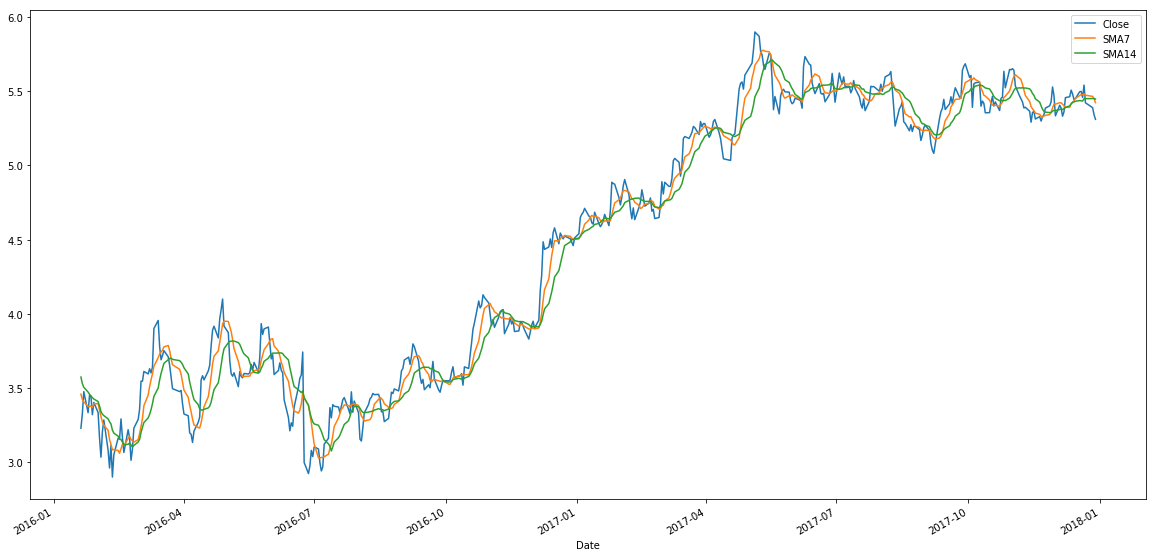

In [29]:
san[['Close','SMA7','SMA14']].iloc[-500:].plot()

Pandas nos ofrece la oportunidad de crear otros indices mas complejos. Sin embargo si queremos facilitar el trabajo existe un librería llamada **Ta-Lib** que nos proporciona la forma de calcular muchos indices y herramientas de detección de patrones en velas japoneas.
Vamos a importar Ta-Lib.

In [30]:
import talib

Calculemos ahora las medias exponenciales de 20 y 60 días.

In [31]:
san['EMA20']=talib.EMA(san['Close'].values, timeperiod=20)
san['EMA60']=talib.EMA(san['Close'].values, timeperiod=60)

Gráficamos los 1000 primeros días.

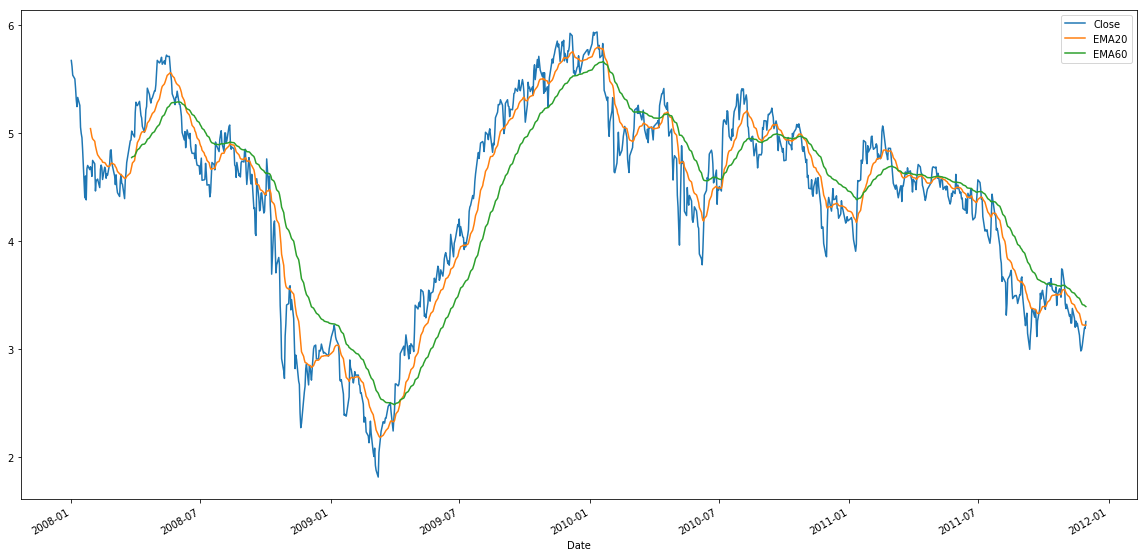

In [32]:
san[['Close','EMA20','EMA60']].iloc[:1000].plot()

Añadamos un indice que tenga varias lineas como las bandas de Bollinger. Y graficamos el año 2016.

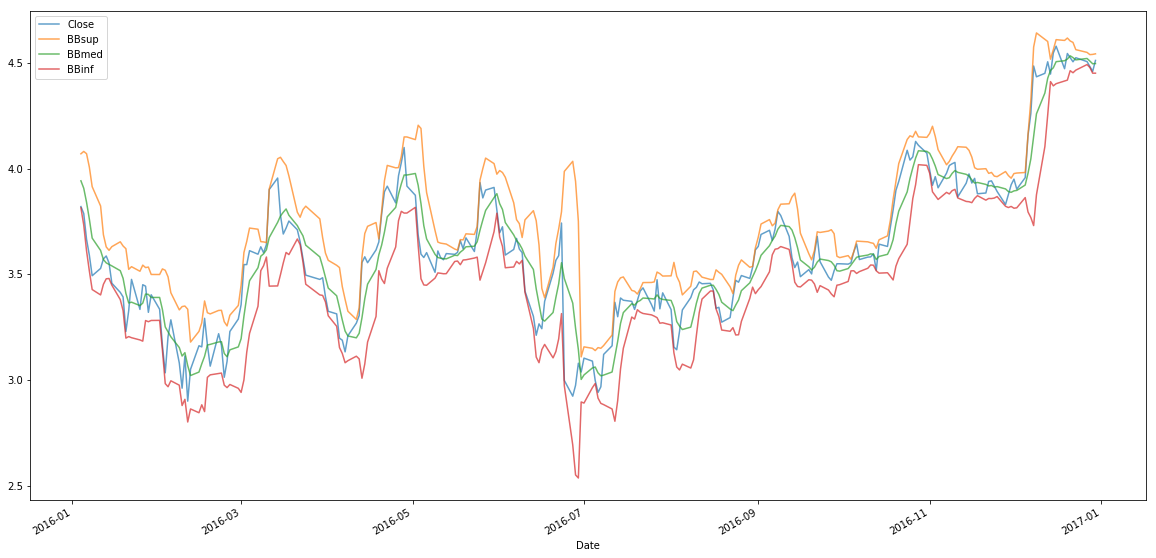

In [33]:
san['BBsup'], san['BBmed'], san['BBinf']=talib.BBANDS(san['Close'].values)
san[['Close','BBsup','BBmed','BBinf']][diario.index.year==2016].plot(alpha=0.7)

En su [repositorio de Github](https://github.com/mrjbq7/ta-lib) podemos comprobar la lista completas de indices y estudios que ofrece Ta-Lib.

---

Hasta aquí esta primera parte, donde hemos visto algunas de las posibilidades que nos ofrece Python a traves de Pandas y algunos otros modulos de trabajar con series temporales financieras.

En el siguiente notebook continuaremos con algunos otros estudios.

---